# Tarea 5 - CIFAR-10 / Redes Neuronales Convolucionales (CNN)
## Variantes de arquitecturas CNN LeNet-5 y VGG
### ITESM - MCC
#### Tópicos selectos de AI

## Carlos E. Hdz Rincón - A011181616

## Imports

In [0]:
%matplotlib inline
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.model_selection as model_selection
import time
import random

## 1. Realiza un breve resumen sobre en qué consisten las bases de datos CIFAR-10 y CIFAR-100.

CIFAR10 y CIFAR100 son datasets etiquetados curados por Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

### CIFAR-10

El dataset CIFAR10 consiste de 60,000 imágenes a color de un tamaño de 32x32 pixeles separados en 10 clases discretas.

El dataset está dividido en 50,000 imágenes de entrenamiento y 10,000 para prueba. El dataset está dividido en 5 lotes de entrenamiento y 1 lote de prueba, cada uno de 10,000 imágenes.

El lote de entrenamiento contiene 1,000 imágenes seleccionadas al azar para cada clase, mientras que el lote de entrenamiento tiene el resto de las imágenes sin un orden concreto.

Las clases son mutuamente exclusivas así que no hay ambigüedad entre ellas:

1. Avión
2. Automóvil
3. Pájaro
4. Gato
5. Ciervo
6. Perro
7. Rana
8. Caballo
9. Barco
10. Camión

### CIFAR100

Es muy similar a CIFAR10, pero contiene 100 clases con 600 imágenes cada una que, a su vez, están agrupadas en 20 super clases.

Cada clase está dividida en 500 imágenes de entrenamiento y 100 de prueba y tiene una etiqueta *fine* con la clase a la que pertenece y una etiqueta *coarse* con la superclase a la que pertenece.

Las clases y superclases son:


This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

Here is the list of classes in the CIFAR-100:

| Superclass | Classes |
|------------|---------|
|aquatic mammals|	beaver, dolphin, otter, seal, whale|
|fish	|aquarium fish, flatfish, ray, shark, trout|
|flowers	|orchids, poppies, roses, sunflowers, tulips|
|food containers|	bottles, bowls, cans, cups, plates|
|fruit and vegetables|	apples, mushrooms, oranges, pears, sweet peppers|
|household electrical devices|	clock, computer keyboard, lamp, telephone, television|
|household furniture|	bed, chair, couch, table, wardrobe|
|insects|	bee, beetle, butterfly, caterpillar, cockroach|
|large carnivores|	bear, leopard, lion, tiger, wolf|
|large man-made outdoor things|	bridge, castle, house, road, skyscraper|
|large natural outdoor scenes|	cloud, forest, mountain, plain, sea|
|large omnivores and herbivores|	camel, cattle, chimpanzee, elephant, kangaroo|
|medium-sized mammals|	fox, porcupine, possum, raccoon, skunk|
|non-insect invertebrates|	crab, lobster, snail, spider, worm|
|people|	baby, boy, girl, man, woman|
|reptiles|	crocodile, dinosaur, lizard, snake, turtle|
|small mammals|	hamster, mouse, rabbit, shrew, squirrel|
|trees|	maple, oak, palm, pine, willow|
|vehicles 1|	bicycle, bus, motorcycle, pickup truck, train|
|vehicles 2|	lawn-mower, rocket, streetcar, tank, tractor|



## 2. Carga de Datos
Deberás cargar los datos y hacer el procesamiento mínimo para normalizar los datos de entrada y
agregar las variables dicotómicas correspondientes a la variable de salida con el método one-hot
encoding. 

In [2]:
(x_train, y_train), (x_test_general, y_test_general) = tf.keras.datasets.cifar10.load_data()

readable_labels = ["Plane",
                   "Car",
                   "Bird",
                   "Cat",
                   "Deer",
                   "Dog",
                   "Frog",
                   "Horse",
                   "Ship",
                   "Truck"]

# Normalize input data
x_train, x_test_general = x_train/255.0, x_test_general/255.0

# Partition Test into Validation and Test sets

# 80% of the whole test set will go to be the validation test and 20%
#  will be the actual test set
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test_general,
                                                                y_test_general,
                                                                train_size=0.80,
                                                                test_size=0.20)


# One-hot encode the training, validation and test classes
y_one_hot_train = tf.keras.utils.to_categorical(y_train)
y_one_hot_val = tf.keras.utils.to_categorical(y_val)
y_one_hot_test = tf.keras.utils.to_categorical(y_test)

170500096/170498071 [==============================] - 13s 0us/step


In [3]:
print(f"Training Data Shape: {x_train.shape}")
print(f"Validation Data Shape: {x_val.shape}")
print(f"Test Data Shape: {x_test.shape}")

print("\n---------- RAW Label Data ------------")
print(f"Raw Training Label Shape: {y_train.shape}")
print(f"Raw Validation Label Shape: {y_val.shape}")
print(f"Raw Test Label Shape: {y_test.shape}")
print(f"Raw Test Label Sample: {y_test}")

print("\n---------- One-Hot Encoded Label Data ------------")

# One-hot encoded data 
print(f"One-hot encoded Training Label Shape: {y_one_hot_train.shape}")
print(f"One-hot encoded Validation Label Shape: {y_one_hot_val.shape}")
print(f"One-hot encoded Test Label Shape: {y_one_hot_test.shape}")
print(f"One-hot encoded Test Label Sample: {y_one_hot_test}")

Training Data Shape: (50000, 32, 32, 3)
Validation Data Shape: (8000, 32, 32, 3)
Test Data Shape: (2000, 32, 32, 3)

---------- RAW Label Data ------------
Raw Training Label Shape: (50000, 1)
Raw Validation Label Shape: (8000, 1)
Raw Test Label Shape: (2000, 1)
Raw Test Label Sample: [[6]
 [7]
 [7]
 ...
 [6]
 [4]
 [8]]

---------- One-Hot Encoded Label Data ------------
One-hot encoded Training Label Shape: (50000, 10)
One-hot encoded Validation Label Shape: (8000, 10)
One-hot encoded Test Label Shape: (2000, 10)
One-hot encoded Test Label Sample: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## 3. Muestra de dataset

Despliega al menos una imagen de cada una de las 10 clases del conjunto de entrenamiento y del conjunto de prueba. ¿Por qué consideras qué podría ser adecuado realizar este paso?

---
Porque permite inspeccionar el dataset tanto de entrenamiento como de prueba y asegurarse que las etiquetas estén correctas así como cerciorarse de cuánto
ruido puede haber en la imagen para anticipar cómo afinar el modelo a utilizar.


In [0]:
# First map all images to its classes to be able to pick one sample of each easily
#  this map will allow us with point 4 where we need to know how many pictures
#  are for each class.
def map_images_to_classes(images: list, labels: list) -> dict:
    images_by_class = {}
    
    for idx, image in enumerate(images):
        # The class is stored in a 1-D NpArray, so we need to unpack the value
        class_id = labels[idx][0]
        
        if class_id not in images_by_class:
            images_by_class[class_id] = [image]
        else:
            images_by_class[class_id].append(image)
    
    return images_by_class

# Use the original 0-9 classes instead of the one-hot encoding
training_images_by_class = map_images_to_classes(x_train, y_train)
validation_images_by_class = map_images_to_classes(x_val, y_val)
test_images_by_class = map_images_to_classes(x_test, y_test)

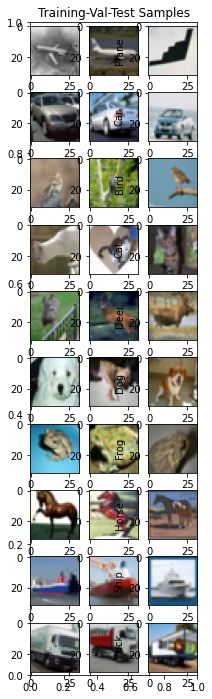

In [0]:
# Draw images
sample_fig = plt.figure(figsize=(3, 12))
plt.title("Training-Val-Test Samples")

rows = 10
columns = 3

plot_position = 0

for class_num in range(10): # For each of the 10 classes
    # In the training set there are 5000 images per class and in the test set
    #  there are 1000 per class

    training_image = random.choice(training_images_by_class[class_num])
    val_image = random.choice(validation_images_by_class[class_num])
    test_image = random.choice(test_images_by_class[class_num])

    

    plot_position += 1
    sample_fig.add_subplot(rows, columns, plot_position)
    plt.imshow(training_image)

    plot_position += 1
    sample_fig.add_subplot(rows, columns, plot_position)
    plt.imshow(val_image)

    plot_position += 1
    sample_fig.add_subplot(rows, columns, plot_position)
    plt.imshow(test_image)

    
    plt.ylabel(readable_labels[class_num])
    

plt.show()

## 4. Descripción de dataset
Encuentre el número de imágenes que hay en cada una de las 10 clases, tanto del conjunto de entrenamiento como en el conjunto de prueba. ¿Por qué consideras qué podría ser adecuado realizar este paso?

---

Porque permite asegurarse que el dataset que se utilizará todas las imágenes que
esperamos y que el split entre training y test data set haya sido correcto.


In [5]:
print("-------------Training dataset summary-------------")

for class_id in range(10):
    print(f"For class ID {class_id} ({readable_labels[class_id]}) there are   \t\
            {len(training_images_by_class[class_id])} images")
    
print("\n\n-------------Validation dataset summary-------------")

for class_id in range(10):
    print(f"For class ID {class_id} ({readable_labels[class_id]}) there are   \t\
            {len(validation_images_by_class[class_id])} images")

print("\n\n-------------Test dataset summary-------------")

for class_id in range(10):
    print(f"For class ID {class_id} ({readable_labels[class_id]}) there are   \t\
            {len(test_images_by_class[class_id])} images")

-------------Training dataset summary-------------
For class ID 0 (Plane) there are   	            5000 images
For class ID 1 (Car) there are   	            5000 images
For class ID 2 (Bird) there are   	            5000 images
For class ID 3 (Cat) there are   	            5000 images
For class ID 4 (Deer) there are   	            5000 images
For class ID 5 (Dog) there are   	            5000 images
For class ID 6 (Frog) there are   	            5000 images
For class ID 7 (Horse) there are   	            5000 images
For class ID 8 (Ship) there are   	            5000 images
For class ID 9 (Truck) there are   	            5000 images


-------------Validation dataset summary-------------
For class ID 0 (Plane) there are   	            805 images
For class ID 1 (Car) there are   	            796 images
For class ID 2 (Bird) there are   	            818 images
For class ID 3 (Cat) there are   	            805 images
For class ID 4 (Deer) there are   	            803 images
For class ID 5 

## 5. Optimizador mini-batch SGD

Utiliza el método de optimización mini-batch Gradiente Estocástico. Para ello deberás determinar el mejor valor que consideres para la tasa de aprendizaje (learning rate), el tamaño de cada bloque (batch size) y el número de épocas (epochs). Igualmente indica si fue conveniente utilizar el momentum y Nesterov.


---

El número de cada bloque (*batch*) debe ser un valor potencia de 2, 32 es un buen valor por defecto pero otros valores como 64 o 128 pueden ser utilizados.
*Masters & Luschi (2018)* recomiendan usar valores pequeños para el batch de no
más de 32, siendo 32 el que obtiene mejores resultados en la estabilidad del
entrenamiento y el rendimiento de la generalización.

La cantidad de pesos que son actualizados durante el entrenamiento se conoce
como la tasa de aprendizaje. La tasa de aprendizaje debe ser afinada de acuerdo al problema pero valores de 0.1 o 0.01 son buenos puntos iniciales. Para nuestro problema utilizaremos 0.01.

El momento es conveniente utilizarlo ya que puede facilitar el proceso de
aprendizaje y acelerar el proceso de entrenamiento. Valores usualmente usados para el momentum son 0.5, 0.9 y 0.99. *(Goodfellow et al., 2016)* Para nuestro problema utilizaremos 0.7

Usar Nesterov ayuda a reducir la posibilidad de evitar pasar el valor óptimo de error.

### Utilidades para evaluación de modelo
Las siguientes funciones nos servirán para abstraer la generación del reporte del modelo para enfocarnos únicamente en los experimentos.

In [0]:
def compile_sgd_optimizer(model_to_fit: tf.python.keras.engine.training.Model,
                          epochs: int,
                          batch: int,
                          learning_rate: float,
                          momentum: float,
                          use_nesterov: bool = True) -> tf.python.keras.engine.training.Model:
    
    optimizer = tf.keras.optimizers.SGD(lr=learning_rate,
                                    decay=learning_rate / epochs,
                                    momentum=momentum,
                                    nesterov=use_nesterov)

    model_to_fit.compile(optimizer=optimizer,
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
    return model_to_fit


def train_model(model_to_fit: tf.python.keras.engine.training.Model,
                epochs: int,
                batch: int,
                train_data: tuple,
                validation_data: tuple,
                callbacks: list = None):

    t = time.process_time()
    
    trained_model = model_to_fit.fit(train_data[0],
                                     train_data[1],
                                     validation_data=validation_data,
                                     epochs=epochs,
                                     batch_size=batch,
                                     callbacks=callbacks)
    
    elapsed_time = time.process_time() - t
    
    print(f"\n\n ********* Training time: {elapsed_time} s.")
    return trained_model

def graph_loss_accuracy(h_model,
                        epochs: int,
                        subtitle: str = ""):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,epochs),h_model.history["accuracy"],label="train_acc")
    plt.plot(np.arange(0,epochs),h_model.history["val_accuracy"],label="val_acc")
    plt.title("Training and Validation Accuracy" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.figure()
    plt.plot(np.arange(0,epochs),h_model.history["loss"],label="train_loss") 
    plt.plot(np.arange(0,epochs),h_model.history["val_loss"],label="val_loss")
    plt.title("Training and Validation Loss" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

def print_error_samples(dataset_tuple, dataset_predictions):
    print("\n\nError Samples\n")
    dataset_images = dataset_tuple[0]
    y_one_hot_embeddings = dataset_tuple[1]

    # Get wrong Records
    rounded_prediction = np.round(dataset_predictions)

    wrong_indices = [idx for idx, pred_encoding in enumerate(rounded_prediction) 
            if not (pred_encoding == y_one_hot_embeddings[idx]).all()]
    wrongly_predicted_images = [dataset_images[i] for i in wrong_indices]

    # Get some samples:

    wrong_samples = random.sample(wrongly_predicted_images, 30)

    # Draw them

    sample_fig = plt.figure(figsize=(3, 12))
    plt.title("Samples of problematic images")
    plt.rcParams["axes.grid"] = False

    rows = 10
    columns = 3

    plot_position = 0

    for sample in wrong_samples:

        plot_position += 1
        sample_fig.add_subplot(rows, columns, plot_position)
        plt.imshow(sample)


# Helper functions for reporting

def print_dataset_prediction_report(predictions,
                                    dataset_tuple: tuple,
                                    human_readable_labels: list,
                                    dataset_title: str):
    # For classification_report the one_hot_encoding test labels are needed,
    #  these are passed in the validation_tuple[1] and test_tuple[1]
    print(f"\n\nClassification Report - {dataset_title}:")
    print(classification_report(dataset_tuple[1].argmax(axis=1), 
                            predictions.argmax(axis=1),
                            target_names=human_readable_labels))
    
    print(f"\n\nConfusion Matrix: - {dataset_title}:")
    print(confusion_matrix(dataset_tuple[1].argmax(axis=1),
                           predictions.argmax(axis=1)))


def evaluate_model(model_to_fit: tf.python.keras.engine.training.Model,
                   epochs: int,
                   batch: int,
                   learning_rate: float,
                   momentum: float,
                   train_tuple: tuple,
                   validation_tuple: tuple,
                   test_tuple: tuple,
                   labels: list,
                   use_nesterov: bool = True,
                   callbacks: list = None,
                   should_print_test_error_samples: bool = False):
    
    subtitle = f"Epochs: {epochs} Batch: {batch} LR: {learning_rate}"

    model_to_fit = compile_sgd_optimizer(model_to_fit,
                               epochs,
                               batch,
                               learning_rate,
                               momentum,
                               use_nesterov)

    trained_model_history = train_model(model_to_fit,
                                epochs,
                                batch,
                                train_tuple,
                                validation_tuple,
                                callbacks=callbacks)
                                    
    model_to_fit.summary()

    print("\n\n ****** Validation Dataset Prediction Report ******")
    val_model_predictions = model_to_fit.predict(validation_tuple[0],
                                                 batch_size=batch)
    
    print_dataset_prediction_report(val_model_predictions,
                                    validation_tuple,
                                    labels,
                                    "Validation Dataset")


    print("\n\n ****** Test Dataset Prediction Report ******")

    # Use the test_tuple for predictions instead of the validation
    #  The test images are in the first position of the test_tuple
    test_model_predictions = model_to_fit.predict(test_tuple[0], batch_size=batch)
    
    print_dataset_prediction_report(test_model_predictions,
                                    test_tuple,
                                    labels,
                                    "Test Dataset")
    
    if should_print_test_error_samples:
        print_error_samples(test_tuple, test_model_predictions)
    
    graph_loss_accuracy(trained_model_history, epochs=epochs, subtitle=subtitle)

## 6. LeNet-5

### 6.1 LeNet-5 sin Batch Normalization

A partir del mejor modelo encontrado utilizando la arquitectura de la red neuronal convolucional (CNN) LeNet-5 como fue definida en el artículo original (página 7): http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf, responde a los siguientes incisos para tu mejor modelo encontrado (utiliza la función de activación sigmoide en las capas ocultas y la función tangente hiperbólica en las capas de salida):

1. Tiempo de entrenamiento del modelo.
2. Cantidad de parámetros del modelo.
3. El reporte de las predicciones del conjunto de prueba con las métricas precisión, recall y f1-score.
4. Las gráficas de la precisión (accuracy) y el error de los conjuntos de entrenamiento y prueba.
5. La tabla de confusión de las predicciones con respecto a las etiquetas reales del conjunto de prueba.
6. Reporta tus conclusiones de los resultados obtenidos.

---

### Conclusiones

El modelo corrido con los hiperparámetros obtenidos después de experimentación:
* Learning Rate: 0.01
* Batch: 32
* Momentum Nesterov: 0.9
* Engine: GPU
* Función activación: tanh

Parece tener un accuracy en las pruebas de alrededor 60% que no mejora significativamente con más epochs:

* Epochs: 50
    * Training Accuracy: 83.09%
    * Test Accuracy: 62%
    * Time: 371.69s
* Epochs: 100 - Test Accuracy:
    * Training Accuracy: 100%
    * Test Accuracy: 61%
    * Time: 740.53

Si bien el Accuracy en Training parece subir de manera estable con más epochs, las gráficas muestras un overfitting que empeora cuanto más epochs sean utilizados, lo cual indica que el modelo no está generalizando y probablemente no lo hará.

En 100 Epochs, el sesgo (bias) ha sido practicamente eliminado, pero hay una varianza muy grande tanto en ese caso como en 50 epochs.

Esto nos sugiere que aplicar regularización durante el entrenamiento pudiera reducir la varianza y que epochs entre 50-100 pudiera darnos un resultado óptimo en un tiempo aceptable.



#### 6.1.1. Sin Batch Normalization, 100 Epochs
Las variable de epoch, learning rate y momentum se indican en la llamada a evaluate_model

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0732 - accuracy: 0.2253 - val_loss: 1.8243 - val_accuracy: 0.3340
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6855 - accuracy: 0.3906 - val_loss: 1.6225 - val_accuracy: 0.4171
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5309 - accuracy: 0.4537 - val_loss: 1.4397 - val_accuracy: 0.4863
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3992 - accuracy: 0.4999 - val_loss: 1.3642 - val_accuracy: 0.5084
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3004 - accuracy: 0.5358 - val_loss: 1.2817 - val_accuracy: 0.5341
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2308 - accuracy: 0.5614 - val_loss: 1.2409 - val_accuracy: 0.5539
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1666 - accuracy: 0.5851 - val_loss: 1.2112 - val_ac

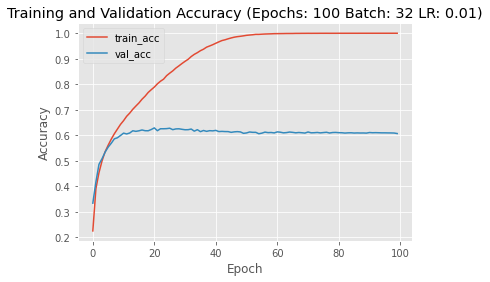

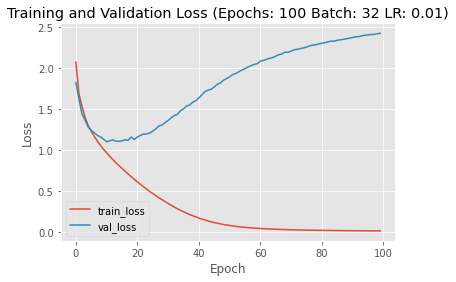

In [0]:
lenet5_no_bn_model = tf.keras.models.Sequential([

   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_no_bn_model,
               epochs=100,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)


#### 6.1.2. Sin Batch Normalization, 50 Epochs

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3346 - accuracy: 0.1000 - val_loss: 2.3562 - val_accuracy: 0.1028
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1017 - accuracy: 0.2123 - val_loss: 1.8320 - val_accuracy: 0.3458
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6766 - accuracy: 0.3944 - val_loss: 1.5465 - val_accuracy: 0.4350
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5172 - accuracy: 0.4527 - val_loss: 1.4644 - val_accuracy: 0.4790
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4270 - accuracy: 0.4895 - val_loss: 1.3934 - val_accuracy: 0.4946
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3529 - accuracy: 0.5171 - val_loss: 1.3479 - val_accuracy: 0.5139
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2878 - accuracy: 0.5383 - val_loss: 1.3249 - val_accuracy:

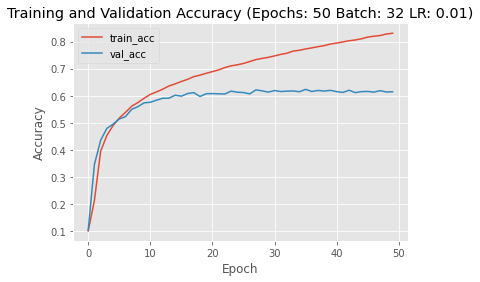

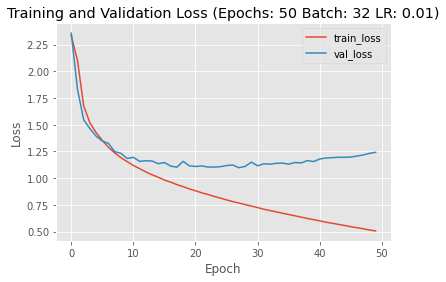

In [0]:
lenet5_no_bn_model_50_batch = tf.keras.models.Sequential([

   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])

evaluate_model(lenet5_no_bn_model_50_batch,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.2 LeNet-5 con Batch Normalization
Incluye ahora en el modelo de la CNN la normalización por bloques (Batch NormalizationBN) y repite los incisos “a” a “f”. Deberás indicar si resulta mejor usar BN antes o después de las funciones de activación. Además, indica qué observas en las gráficas de precisión y error con respecto al caso anterior.

---

### Conclusiones

El modelo corrido con los hiperparámetros:
* Learning Rate: 0.01
* Batch: 32
* Momentum Nesterov: 0.9
* Engine: GPU
* Batch: 50
* BatchNormalization
* Función activación: tanh

Parece tener un accuracy en las pruebas de alrededor 60% que no mejora significativamente con más epochs:

* BN Antes de activación:
    * Training Accuracy: 98.4%
    * Test Accuracy: 62%
    * Time: 449.35s
* BN Después de activación:
    * Training Accuracy: 99.60%
    * Test Accuracy: 63%
    * Time: 452.53s

El tiempo de entrenamiento sube un poco más por epoch, muy probablemente debido a las operaciones de normalización, pero el accuracy en training sube más rápidamente comparado a no tener Batch Normalization.

El accuracy de entrenamiento es mejor con BN pero el overfitting es mucho más evidente incluso a 50 epochs. El modelo sigue sin generalizar de manera adecuada a los datos de prueba, esto se puede apreciar mucho con las gráficas de loss sin BN comparadas con las que sí tiene BN, independientemente de si el BN se aplica antes o después.

El bias ha sido casi eliminado en los dos casos, pero con BN después de la activación el resultado es ligeramente mejor tanto en el training accuracy como en el test accuracy.

Sin embargo, la varianza sigue sin ser mejorada mucho con respecto a no usar BN.

Estos resultados sugieren que hemos hecho lo correcto para quitar el sesgo y que se consigue esto en 50 epochs, pero debemos continuar reduciendo la varianza con otros tipos de regularización.

#### 6.2.1. LeNet-5 Batch Normalized, 50 Epochs, BN antes de activación

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5098 - accuracy: 0.4622 - val_loss: 1.3899 - val_accuracy: 0.5080
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2593 - accuracy: 0.5536 - val_loss: 1.2521 - val_accuracy: 0.5575
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1247 - accuracy: 0.6051 - val_loss: 1.2125 - val_accuracy: 0.5721
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0245 - accuracy: 0.6410 - val_loss: 1.2340 - val_accuracy: 0.5764
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9388 - accuracy: 0.6724 - val_loss: 1.1910 - val_accuracy: 0.5947
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8640 - accuracy: 0.6982 - val_loss: 1.0912 - val_accuracy: 0.6251
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7945 - accuracy: 0.7236 - val_loss: 1.1770 - val_accuracy:

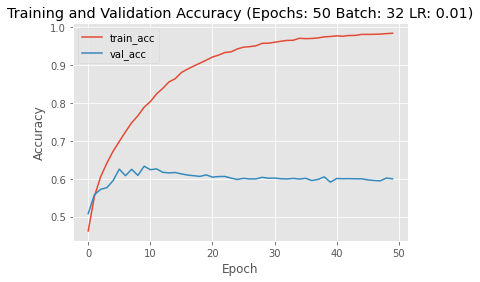

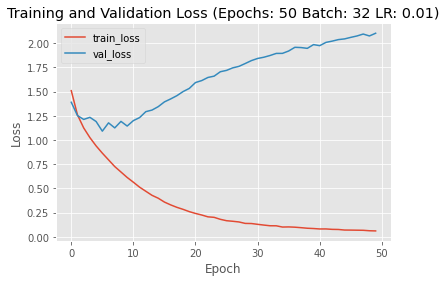

In [0]:
lenet5_with_bn_before_model = tf.keras.models.Sequential([
   #BN Before C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   # Batch Normalization before C3 Activation Function
   tf.keras.layers.BatchNormalization(axis=-1),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   tf.keras.layers.BatchNormalization(axis=-1),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_with_bn_before_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.2.2. LeNet-5 Batch Normalized, 50 Epochs, BN después de activación

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4817 - accuracy: 0.4696 - val_loss: 1.3200 - val_accuracy: 0.5359
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1649 - accuracy: 0.5888 - val_loss: 1.4527 - val_accuracy: 0.5131
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0004 - accuracy: 0.6504 - val_loss: 1.1652 - val_accuracy: 0.5950
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8807 - accuracy: 0.6892 - val_loss: 1.0494 - val_accuracy: 0.6396
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7800 - accuracy: 0.7268 - val_loss: 1.1547 - val_accuracy: 0.6130
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6927 - accuracy: 0.7579 - val_loss: 1.3056 - val_accuracy: 0.5888
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6199 - accuracy: 0.7838 - val_loss: 1.1752 - val_accuracy:

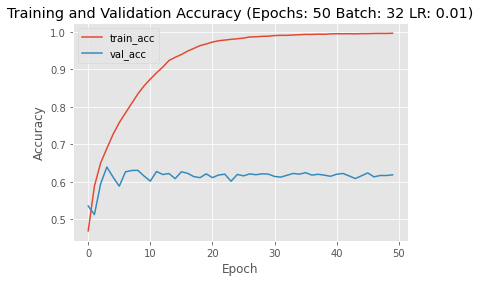

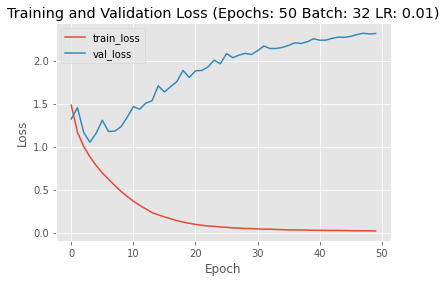

In [0]:
lenet5_with_bn_after_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_with_bn_after_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.3 Average Pooling
Utiliza el método de AveragePooling en lugar del MaxPooling y reporta tus conclusiones.

---

### Conclusiones

El modelo corrido con los hiperparámetros:
* Learning Rate: 0.01
* Batch: 32
* Momentum Nesterov: 0.9
* Engine: GPU
* Batch: 50
* BatchNormalization después de cada convolución
* Función de activación: tanh

Parece tener un accuracy en las pruebas de alrededor 60% que no mejora significativamente con más epochs:

* MaxPooling (De acuerdo a resultados anteriores):
    * Training Accuracy: 99.60%
    * Test Accuracy: 63%
    * Time: 452.53s
* AvgPooling (De acuerdo a resultados anteriores):
    * Training Accuracy: 98.93%
    * Test Accuracy: 58%
    * Time: 447.52s

El training accuracy parece bajar un poco usando AvgPooling, y el test accuracy comparado con MaxPooling baja 5%.

Se aprecia que el bias es bastante aceptable ya que es mínimo, pero la varianza sigue siendo muy grande, el modelo padece de overfitting y no se aprecia que el AvgPooling haya ayudado a reducir la varianza, de hecho se aprecia un impacto negativo al usar AvgPooling.

Los siguientes experimentos usarán MaxPooling, y la varianza tan elevada nos indica que debemos aplicar otro tipo de regularización, o cambiar las funciones de activación que están siendo batch-normalized.

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6452 - accuracy: 0.4136 - val_loss: 1.4248 - val_accuracy: 0.4911
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3505 - accuracy: 0.5164 - val_loss: 1.2991 - val_accuracy: 0.5359
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1966 - accuracy: 0.5741 - val_loss: 1.3400 - val_accuracy: 0.5304
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0740 - accuracy: 0.6174 - val_loss: 1.2104 - val_accuracy: 0.5741
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9732 - accuracy: 0.6583 - val_loss: 1.1707 - val_accuracy: 0.5911
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8906 - accuracy: 0.6884 - val_loss: 1.1671 - val_accuracy: 0.6011
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8116 - accuracy: 0.7175 - val_loss: 1.1749 - val_accuracy:

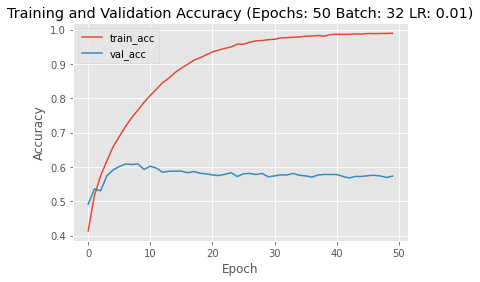

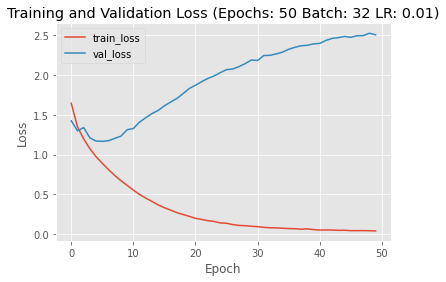

In [0]:
lenet5_avg_pooling_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_avg_pooling_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.4 Funciones de activación
En el siguiente inciso deberás indicar qué funciones de activación resultan mejor utilizar en relación a la sigmoide, tanh y relu. Es decir, indica cuál fue la mejor configuración encontrada: que todas sean sigmoide; todas tanh todas relu; que en las capas ocultas se use relu y en las de salida la tanh, etc. Reporta tus resultados. Considerando los resultados de los incisos anteriores, aplica además los ajustes que mejor consideres.

---

### Conclusiones

El modelo corrido con los hiperparámetros:
* Learning Rate: 0.01
* Batch: 32
* Momentum Nesterov: 0.9
* Engine: GPU
* Batch: 50
* BatchNormalization después de cada convolución
* MaxPooling

#### Resultados

* Todas tanh:
    * Training Accuracy: 99.69%
    * Test Accuracy: 58%
    * Time: 430.31s
* Todas ReLU:
    * Training Accuracy: 99.18%
    * Test Accuracy: 65%
    * Time: 429.68s
* Todas sigmoid:
    * Training Accuracy: 99.66%
    * Test Accuracy: 65%
    * Time: 427.32s
* Tanh en capas ocultas, ReLU en capas de salida:
    * Training Accuracy: 99.39%
    * Test Accuracy: 64%
    * Time: 431.32s
* ReLU en capas ocultas, Tanh en capas de salida:
    * Training Accuracy: 98.60%
    * Test Accuracy: 56%
    * Time: 429.05s
* Tanh en capas ocultas, Sigmoid en capas de salida:
    * Training Accuracy: 99.76%
    * Test Accuracy: 63%
    * Time: 425.76s
* Sigmoid en capas ocultas, Tanh en capas de salida:
    * Training Accuracy: 99.56%
    * Test Accuracy: 64%
    * Time: 434.78s
* ReLU en capas ocultas, Sigmoid en capas de salida:
    * Training Accuracy: 99.56%
    * Test Accuracy: 65%
    * Time: 441.99s
* Sigmoid en capas ocultas, ReLU en capas de salida:
    * Training Accuracy: 99.33%
    * Test Accuracy: 65%
    * Time: 439.48s

La combinación de diferentes funciones de activación permitió lograr una disminución de la varianza con respecto a corridas anteriores. Los peores en tener un test accuracy fueron cuando se usaron _tanh_ en toda la red neuronal y en _ReLU_ como función en capas y _tanh_ como función en capas de salida.

No se aprecia diferencias considerables en el tiempo de ejecución entre cada una de las combinaciones.

En todas las corridas se aprecia un overfit importante a los datos de entrenamiento, que se demuestra en una varianza muy grande en todos los casos. Sin embargo, se nota un bias mínimo en todos los casos.

La pérdida se dispara y tiende a ascender después de alrededor 5 epochs, lo que puede indicar que se deben aplicar más regularización.

#### 6.4.1. Todas tanh

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5006 - accuracy: 0.4604 - val_loss: 1.7093 - val_accuracy: 0.4294
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2239 - accuracy: 0.5639 - val_loss: 1.3343 - val_accuracy: 0.5229
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0757 - accuracy: 0.6186 - val_loss: 1.3579 - val_accuracy: 0.5261
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9536 - accuracy: 0.6648 - val_loss: 1.2129 - val_accuracy: 0.5849
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8621 - accuracy: 0.6970 - val_loss: 1.1337 - val_accuracy: 0.6139
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7701 - accuracy: 0.7316 - val_loss: 1.1804 - val_accuracy: 0.6006
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6963 - accuracy: 0.7571 - val_loss: 1.4021 - val_accuracy:

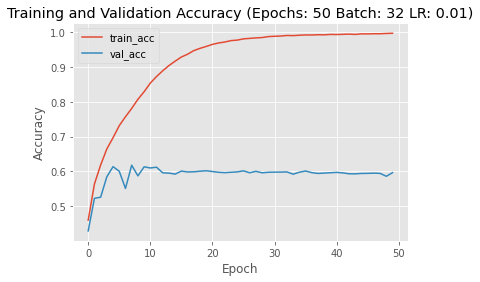

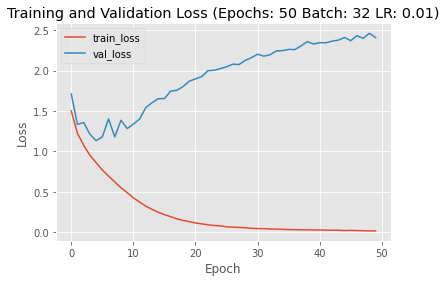

In [0]:
lenet5_all_tanh_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='tanh'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='tanh', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_all_tanh_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.4.2. Todas ReLU

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4325 - accuracy: 0.4848 - val_loss: 1.2638 - val_accuracy: 0.5533
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0921 - accuracy: 0.6120 - val_loss: 1.1261 - val_accuracy: 0.6046
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9236 - accuracy: 0.6719 - val_loss: 1.1566 - val_accuracy: 0.6056
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8088 - accuracy: 0.7168 - val_loss: 1.0093 - val_accuracy: 0.6559
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7102 - accuracy: 0.7497 - val_loss: 0.9924 - val_accuracy: 0.6645
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6247 - accuracy: 0.7812 - val_loss: 1.1158 - val_accuracy: 0.6406
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5531 - accuracy: 0.8048 - val_loss: 1.2838 - val_accuracy:

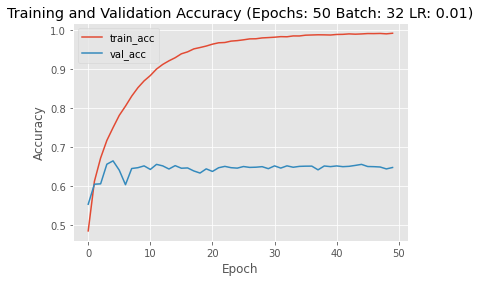

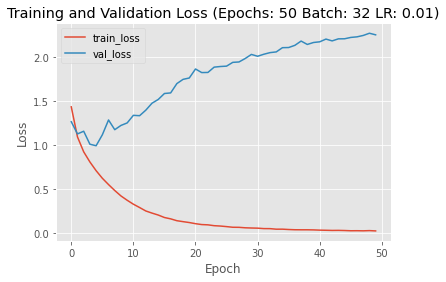

In [0]:
lenet5_all_relu_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_all_relu_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.4.3. Todas Sigmoid

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4599 - accuracy: 0.4815 - val_loss: 1.3338 - val_accuracy: 0.5362
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1466 - accuracy: 0.5961 - val_loss: 2.0239 - val_accuracy: 0.3749
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9917 - accuracy: 0.6517 - val_loss: 1.0445 - val_accuracy: 0.6378
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8816 - accuracy: 0.6922 - val_loss: 1.0097 - val_accuracy: 0.6532
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7922 - accuracy: 0.7229 - val_loss: 1.0029 - val_accuracy: 0.6604
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7124 - accuracy: 0.7534 - val_loss: 1.0180 - val_accuracy: 0.6571
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6380 - accuracy: 0.7811 - val_loss: 0.9684 - val_accuracy:

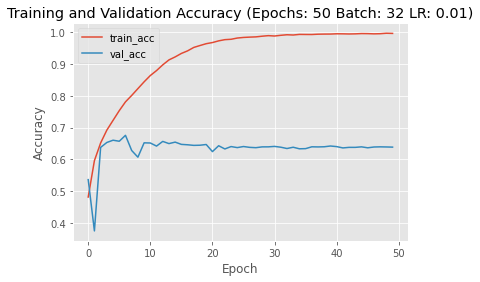

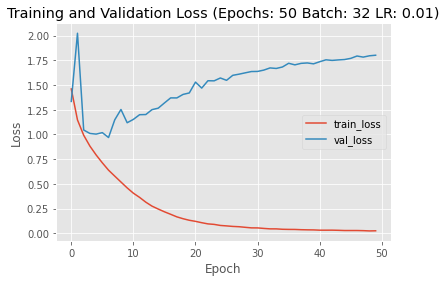

In [0]:
lenet5_all_sigmoid_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='sigmoid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='sigmoid', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='sigmoid'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='sigmoid'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_all_sigmoid_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.4.4. Tanh en capas ocultas, ReLU en capas de salida

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4753 - accuracy: 0.4714 - val_loss: 1.7573 - val_accuracy: 0.4103
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1536 - accuracy: 0.5893 - val_loss: 1.2649 - val_accuracy: 0.5649
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9926 - accuracy: 0.6499 - val_loss: 1.0571 - val_accuracy: 0.6214
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8785 - accuracy: 0.6897 - val_loss: 1.0936 - val_accuracy: 0.6237
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7893 - accuracy: 0.7206 - val_loss: 1.0966 - val_accuracy: 0.6230
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7120 - accuracy: 0.7474 - val_loss: 1.0458 - val_accuracy: 0.6446
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6353 - accuracy: 0.7753 - val_loss: 1.2268 - val_accuracy:

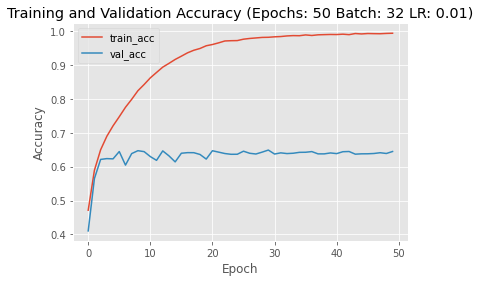

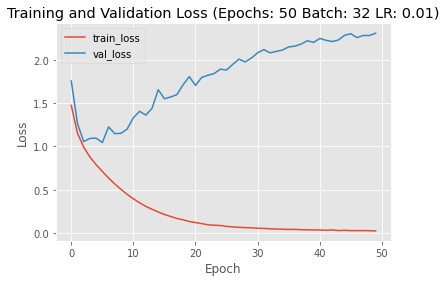

In [0]:
lenet5_tanh_relu_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='tanh'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='tanh', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_tanh_relu_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.4.5. ReLU en capas ocultas, Tanh en capas de salida

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5610 - accuracy: 0.4397 - val_loss: 1.5598 - val_accuracy: 0.4482
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3009 - accuracy: 0.5421 - val_loss: 1.2429 - val_accuracy: 0.5627
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1411 - accuracy: 0.5992 - val_loss: 1.2035 - val_accuracy: 0.5829
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0209 - accuracy: 0.6434 - val_loss: 1.1908 - val_accuracy: 0.5899
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9242 - accuracy: 0.6782 - val_loss: 1.1812 - val_accuracy: 0.6083
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8379 - accuracy: 0.7101 - val_loss: 1.2477 - val_accuracy: 0.5931
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7684 - accuracy: 0.7330 - val_loss: 1.2454 - val_accuracy:

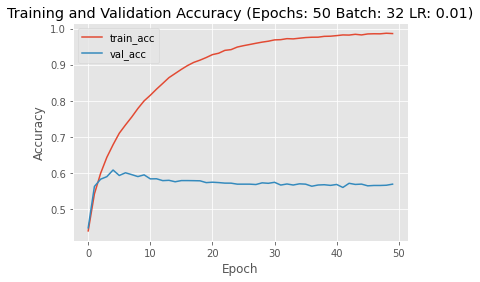

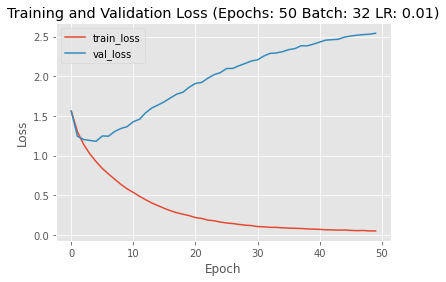

In [0]:
lenet5_relu_tanh_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_relu_tanh_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.4.6. Tanh en capas ocultas, Sigmoid en capas de salida

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4290 - accuracy: 0.4888 - val_loss: 1.3951 - val_accuracy: 0.5188
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1166 - accuracy: 0.6071 - val_loss: 1.4694 - val_accuracy: 0.5142
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9772 - accuracy: 0.6562 - val_loss: 1.4917 - val_accuracy: 0.4974
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8728 - accuracy: 0.6940 - val_loss: 1.2670 - val_accuracy: 0.5685
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7827 - accuracy: 0.7272 - val_loss: 1.1853 - val_accuracy: 0.6030
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7031 - accuracy: 0.7572 - val_loss: 1.0552 - val_accuracy: 0.6365
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6298 - accuracy: 0.7833 - val_loss: 1.0047 - val_accuracy:

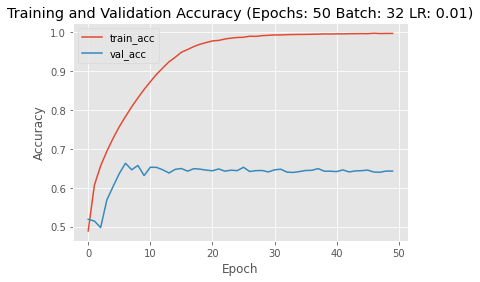

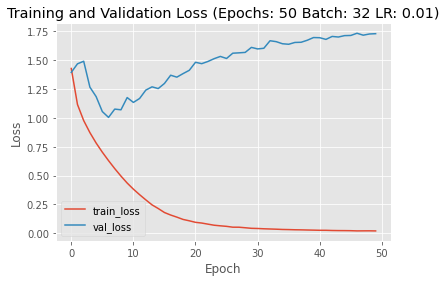

In [0]:
lenet5_tanh_sigmoid_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='tanh'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='tanh', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='sigmoid'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='sigmoid'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_tanh_sigmoid_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.4.7. Sigmoid en capas ocultas, Tanh capas de salida

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5092 - accuracy: 0.4583 - val_loss: 1.4561 - val_accuracy: 0.4766
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2161 - accuracy: 0.5689 - val_loss: 1.2975 - val_accuracy: 0.5536
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0571 - accuracy: 0.6274 - val_loss: 1.0848 - val_accuracy: 0.6154
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9380 - accuracy: 0.6702 - val_loss: 1.0782 - val_accuracy: 0.6258
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8419 - accuracy: 0.7031 - val_loss: 1.0917 - val_accuracy: 0.6254
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7620 - accuracy: 0.7339 - val_loss: 1.0572 - val_accuracy: 0.6407
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6831 - accuracy: 0.7618 - val_loss: 1.1457 - val_accuracy:

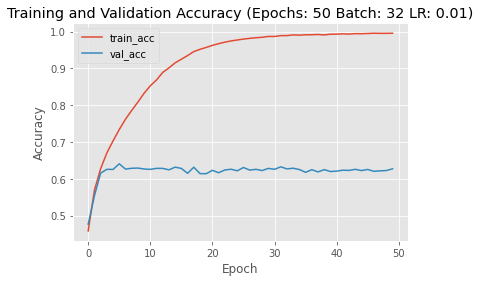

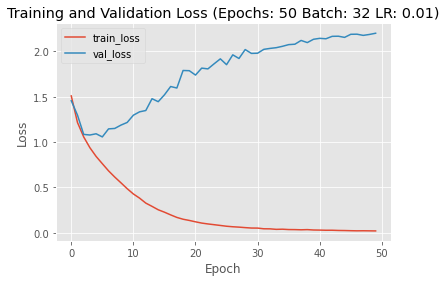

In [0]:
lenet5_sigmoid_tanh_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='sigmoid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='sigmoid', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_sigmoid_tanh_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.4.8. ReLU en capas ocultas, Sigmoid en capas de salida

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4327 - accuracy: 0.4864 - val_loss: 1.3930 - val_accuracy: 0.5160
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1209 - accuracy: 0.6066 - val_loss: 1.0951 - val_accuracy: 0.6201
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9748 - accuracy: 0.6592 - val_loss: 1.1416 - val_accuracy: 0.6054
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8731 - accuracy: 0.6981 - val_loss: 1.1822 - val_accuracy: 0.5934
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7820 - accuracy: 0.7274 - val_loss: 1.1240 - val_accuracy: 0.6210
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7045 - accuracy: 0.7555 - val_loss: 1.0182 - val_accuracy: 0.6591
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6310 - accuracy: 0.7805 - val_loss: 1.1469 - val_accuracy:

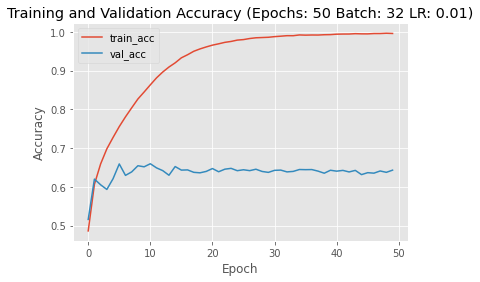

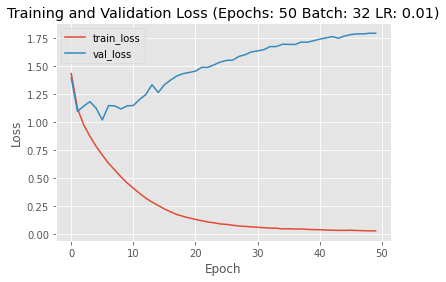

In [0]:
lenet5_relu_sigmoid_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='sigmoid'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='sigmoid'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_relu_sigmoid_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.4.9. Sigmoid en capas ocultas, ReLU en capas de salida

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4414 - accuracy: 0.4830 - val_loss: 1.9562 - val_accuracy: 0.3844
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1248 - accuracy: 0.6039 - val_loss: 1.4637 - val_accuracy: 0.5296
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9739 - accuracy: 0.6548 - val_loss: 1.0545 - val_accuracy: 0.6341
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8604 - accuracy: 0.6967 - val_loss: 1.0305 - val_accuracy: 0.6472
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7727 - accuracy: 0.7272 - val_loss: 0.9980 - val_accuracy: 0.6621
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6925 - accuracy: 0.7563 - val_loss: 0.9970 - val_accuracy: 0.6675
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6237 - accuracy: 0.7808 - val_loss: 1.0773 - val_accuracy:

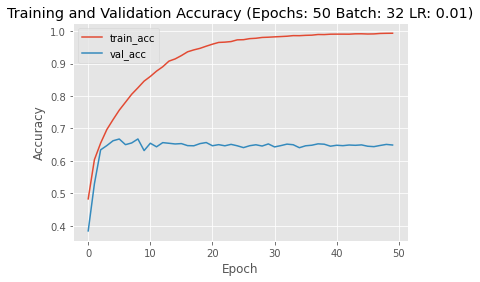

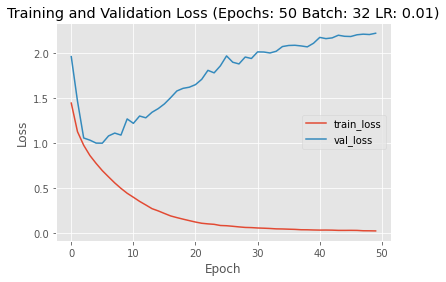

In [0]:
lenet5_sigmoid_relu_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='sigmoid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='sigmoid', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_sigmoid_relu_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.5 Métodos de regularización
Investiga para qué se utilizan los métodos de regularización en una CNN. Puedes consultar el capítulo 7 del libro Deep Learning de Ian Goodfellow/Yoshua Bengio / Aaron Courville. Es de acceso libre: https://www.deeplearningbook.org/. Reporta en un párrafo tus conclusiones.

---
Todo algoritmo de clasificación está limitado por el Teorema de No Almuerzo Gratis (No Free Lunch Theorem NFL) que estipula que dado el promedio de todas las posibles distribuciones de datos generados, todo algoritmo de clasificación tiene el mismo índice de error cuando clasifica datos no observados. En otras palabras, ningún algoritmo de clasificación es mejor que otro.

Esto implica que la meta no es diseñar un algoritmo universal, sino entender las particularidades de nuestro problema cuando se compara con el mundo real para determinar qué algoritmos o hiperparámetros funcionan mejor en nuestra distribución de datos en nuestra tarea específica.

La regularización es cualquier modificación que hacemos al algoritmo de aprendizaje que pretende reducir su error de generalización, pero no su error de entrenamiento. Se podría decir que regularización es tiene una importancia equiparable al de la optimización.

Sin embargo, es bueno notar que el NFL Theorem aplica también a la regularización, lo que implica que no existe una solución de regularización para cada problema, se debe afinar para la tarea que se quiere resolver.

En ocasiones, la regularización se manifiesta como límites o penalizaciones diseñadas para hacer un problema indeterminado determinado. En el contexto de Deep Learning, la mayoría de las estrategias de regularización están basadas en estimadores regularizadores. La regularización de un estimador funciona intercambiando un sesgo (bias) mayor por una varianza menor.


### 6.6 Método de regularización Dropout
Investiga en qué consiste el método de regularización Dropout. Puedes consultar la sección 7.12 del libro de Ian Goodfellow. Reporta en un párrafo tus conclusiones.

---

El Dropout (Srivastava et al., 2014) es un método de regularización que busca activar o desactivar axones entre neuronas de manera aleatoria para reducir la posibilidad de overfitting durante el entrenamiento.

Al hacer esto, Dropout está creando una explicación rápida a entrenar y evaluar un conjunto de exponencialmente muchas redes neuronales. 


#### 6.6.1. Aplicando Dropout
Aplica el método de Dropout a tu modelo ( https://keras.io/layers/core/ ) con valor de 0.5 y comenta los resultados obtenidos. En particular, indica el cambio importante que observas en las gráficas de la precisión y errores, con respecto a las anteriores gráficas.

---

### Conclusiones

Con los siguientes parámetros en la arquitectura:

* Todas las funciones de activación con ReLU
* MaxPooling
* Dropout: 0.5
* Batch: 32
* Epoch: 25

Se aprecian lo siguientes resultados:

* Con Batch Normalization:
    * Training Accuracy: 58.57%
    * Val Accuracy: 62%
    * Test Accuracy: 62%
    * Training Time: 250.06s

* Sin Batch Normalization:
    * Training Accuracy: 59.03%
    * Val Accuracy: 57%
    * Test Accuracy: 58%
    * Training Time: 202.66s

El introducir Dropout claramente se aprecia que la varianza se reduce significativamente y que el modelo está generalizando relativamente bien tanto en el dataset de validación como en el de prueba.

Se aprecia una reducción pequeña en el accuracy, pero es importante indicar que se están alcanzando niveles de accuracy en 25 epochs en lugar de 50 epochs.

El bias aumentó bastante a pesar que la varianza se redujo significativamente, sin embargo, esto es esperado y se explica por el **Bias–variance Tradeoff Principle** que menciona que al reducir el sesgo, la varianza aumentará y viceversa.

Es importante notar que el tiempo de entrenamiento se redujo aproximadamente a la mitad.

Tanto el accuracy como el loss de los datos de validación siguen de cerca la métrica durante el entrenamiento, lo que sugiere una buena generalización. Sin embargo, cuando se usa batch normalization se aprecia que en los datos de validación, si bien tiene una tendencia definida, la información se mantiene errática o "brincando".

Esto es probablemente por el Batch Normalization y se puede apreciar que al quitar Batch Normalization las métricas son más uniformes y menos erráticas.

Esto sugiere que el Batch Normalization podría estar introduciendo un poco de ruido para este problema de clasificación en particular.

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8299 - accuracy: 0.3335 - val_loss: 1.8511 - val_accuracy: 0.3319
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5980 - accuracy: 0.4225 - val_loss: 1.5686 - val_accuracy: 0.4378
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4976 - accuracy: 0.4589 - val_loss: 1.7288 - val_accuracy: 0.4079
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4441 - accuracy: 0.4845 - val_loss: 1.2854 - val_accuracy: 0.5408
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4085 - accuracy: 0.4990 - val_loss: 1.5352 - val_accuracy: 0.4658
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3720 - accuracy: 0.5088 - val_loss: 1.2289 - val_accuracy: 0.5611
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3493 - accuracy: 0.5206 - val_loss: 1.2214 - val_accuracy:

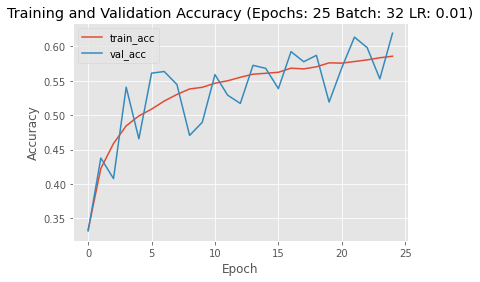

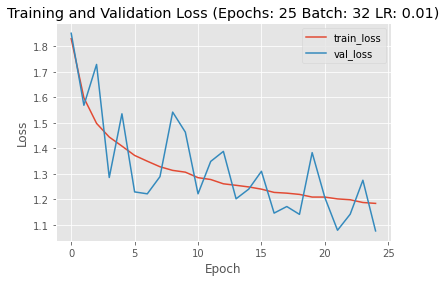

In [0]:
lenet5_dropout_all_relu_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.5),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.5),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   # Dropout
   tf.keras.layers.Dropout(0.5),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_dropout_all_relu_model,
               epochs=25,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

##### 6.6.1.1 Dropout sin batch normalization

Epoch 1/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9211 - accuracy: 0.2863 - val_loss: 1.8583 - val_accuracy: 0.3383
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6839 - accuracy: 0.3822 - val_loss: 1.6495 - val_accuracy: 0.4248
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5846 - accuracy: 0.4245 - val_loss: 1.7661 - val_accuracy: 0.3836
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5188 - accuracy: 0.4519 - val_loss: 1.6686 - val_accuracy: 0.4174
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4745 - accuracy: 0.4677 - val_loss: 1.6210 - val_accuracy: 0.4419
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4400 - accuracy: 0.4857 - val_loss: 1.5906 - val_accuracy: 0.4579
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4095 - accuracy: 0.4966 - val_loss: 1.4263 - val_accuracy:

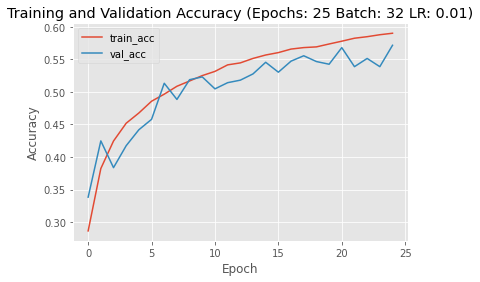

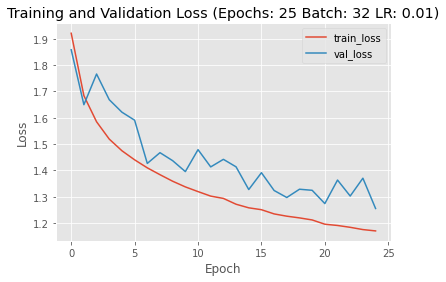

In [0]:
lenet5_dropout_all_relu_no_batch_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   #tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.5),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   #tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.5),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   #tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   # Dropout
   tf.keras.layers.Dropout(0.5),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_dropout_all_relu_no_batch_model,
               epochs=25,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.6.2. Afinando Dropout
Busca el mejor valor de Dropout que consideres adecuado e igualmente, aplica todos los otros cambios que consideres mejor para tu modelo. En general, el valor del Dropout en las capas ocultas oscila entre 0.1 y 0.25 y en las de capas de salida entre 0.25 y 0.5. Reporta tus conclusiones.

---

### Conclusiones

Con los siguientes parámetros en la arquitectura:

* Todas las funciones de activación con ReLU
* MaxPooling
* Batch: 32
* Epoch: 25
* Batch Normalization

Se aprecian lo siguientes resultados:

* Dropout Dense 0.1 - Dropout Output 0.25 :
    * Training Accuracy: 75.57%
    * Val Accuracy: 67%
    * Test Accuracy: 69%
    * Training Time: 250.88s
    * Comparado con modelos sin dropout, la varianza es menor, pero se empieza a apreciar una varianza que probablemente empeore que más epochs. Sin embargo, el accuracy en validación y en test es bastante mejor a modelos sin dropout.

* Dropout Dense 0.1 - Dropout Output 0.5 :
    * Training Accuracy: 72.11%
    * Val Accuracy: 67%
    * Test Accuracy: 69%
    * Training Time: 249.73s
    * El performance es relativamente similar a tener configuraciones de Dropout 0.1-0.25, sin embargo la varianza es menor en esta configuración de Dropout y se puede verificar en un sesgo ligeramente mayor.

* Dropout Dense 0.25 - Dropout Output 0.25 :
    * Training Accuracy: 71.11%
    * Val Accuracy: 68%
    * Test Accuracy: 69%
    * Training Time: 250.62s
    * La varianza es un poco menor que 0.1-0.5 y es confirmado por el ligeramente mayor bias, lo que puede indicar que esta configuración está generalizando un poco mejor.

* Dropout Dense 0.25 - Dropout Output 0.5 :
    * Training Accuracy: 65%
    * Val Accuracy: 66%
    * Test Accuracy: 66%
    * Training Time: 242.84s
    * Posee aún menos varianza que las configuraciones pasadas, pero esto refleja un mayor bias, las gráficas también muestran esto.

En general se aprecia que aplicar el Dropout posee un efecto positivo en reducir la varianza (que implica aumentar el bias) con respecto a no usar el dropout.

Esto quiere decir que en todos los casos se tiene una mejora apreciable a la generalización del proceso de entrenamiento y esto se nota al comparar las métricas de entrenamiento con el dataset de validación y se tiene un performance similarmente bueno cuando el modelo se enfrenta a datos nunca antes vistos en el dataset de entrenamiento.

En todos los casos se aprecia que las métricas en el dataset de validación, si bien tienden a seguir cercanamente a las de entrenamiento, se comportan de manera un tanto errática. Esto puede ser debido a ruido introducido por el proceso de Batch Normalization, como se menciona en el punto anterior, esto puede sugerir que el Batch Normalization puede no estar ayudando mucho a generalizar la red en este problema particular.

Dicho esto, el Batch Normalization no introduce una penalización significativa.

En general, el Dropout sí es necesario para este problema y la configuración que parece generalizar mejor para el problema es la de usar **Dropout de 0.25 para capas ocultas y 0.5 para capas de salida**. 

##### 6.6.2.1 Dropout Dense 0.1 - Dropout Output 0.25

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6134 - accuracy: 0.4198 - val_loss: 1.3771 - val_accuracy: 0.5081
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3514 - accuracy: 0.5158 - val_loss: 1.2197 - val_accuracy: 0.5676
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2329 - accuracy: 0.5595 - val_loss: 1.1547 - val_accuracy: 0.5878
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1452 - accuracy: 0.5919 - val_loss: 1.0944 - val_accuracy: 0.6096
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0814 - accuracy: 0.6167 - val_loss: 1.0562 - val_accuracy: 0.6246
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0358 - accuracy: 0.6351 - val_loss: 1.0670 - val_accuracy: 0.6212
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9862 - accuracy: 0.6518 - val_loss: 1.1495 - val_accuracy:

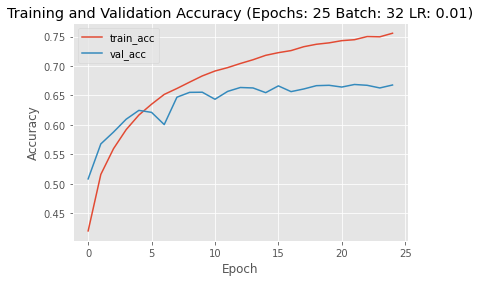

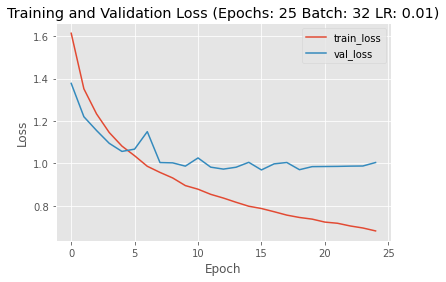

In [0]:
lenet5_dropout_1_25_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.1),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.1),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   # Dropout
   tf.keras.layers.Dropout(0.25),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_dropout_1_25_model,
               epochs=25,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

##### 6.6.2.2 Dropout Dense 0.1 - Dropout Output 0.5

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6783 - accuracy: 0.3946 - val_loss: 1.4909 - val_accuracy: 0.4665
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3964 - accuracy: 0.4981 - val_loss: 1.3078 - val_accuracy: 0.5399
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2851 - accuracy: 0.5414 - val_loss: 1.1541 - val_accuracy: 0.5915
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2189 - accuracy: 0.5666 - val_loss: 1.2321 - val_accuracy: 0.5623
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1655 - accuracy: 0.5874 - val_loss: 1.1137 - val_accuracy: 0.6071
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1211 - accuracy: 0.6026 - val_loss: 1.0909 - val_accuracy: 0.6125
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0796 - accuracy: 0.6205 - val_loss: 1.0743 - val_accuracy:

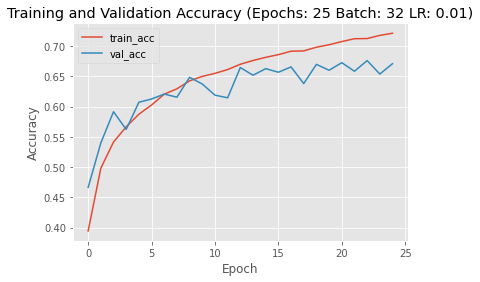

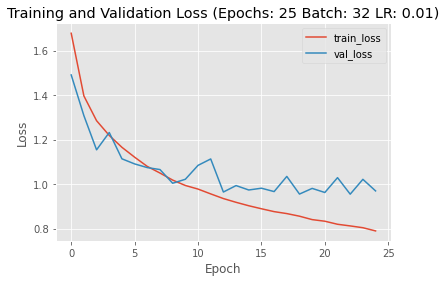

In [0]:
lenet5_dropout_1_5_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.1),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.1),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   # Dropout
   tf.keras.layers.Dropout(0.5),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_dropout_1_5_model,
               epochs=25,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

##### 6.6.2.3 Dropout Dense 0.25 - Dropout Output 0.25

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6058 - accuracy: 0.4214 - val_loss: 1.5219 - val_accuracy: 0.4624
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3295 - accuracy: 0.5265 - val_loss: 1.2530 - val_accuracy: 0.5458
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2231 - accuracy: 0.5647 - val_loss: 1.2095 - val_accuracy: 0.5666
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1558 - accuracy: 0.5910 - val_loss: 1.2154 - val_accuracy: 0.5724
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1039 - accuracy: 0.6090 - val_loss: 1.2274 - val_accuracy: 0.5670
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0751 - accuracy: 0.6209 - val_loss: 1.0500 - val_accuracy: 0.6280
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0484 - accuracy: 0.6302 - val_loss: 1.2228 - val_accuracy:

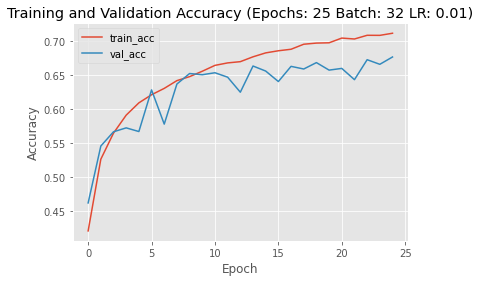

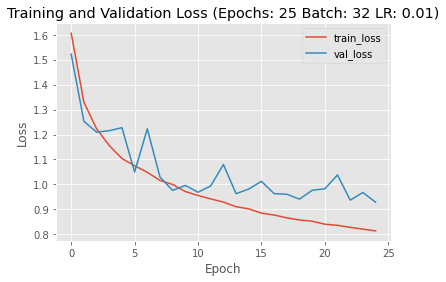

In [0]:
lenet5_dropout_25_25_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.25),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.25),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   # Dropout
   tf.keras.layers.Dropout(0.25),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_dropout_25_25_model,
               epochs=25,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

##### 6.6.2.4 Dropout Dense 0.25 - Dropout Output 0.5

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7067 - accuracy: 0.3780 - val_loss: 1.5014 - val_accuracy: 0.4691
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4918 - accuracy: 0.4610 - val_loss: 1.4479 - val_accuracy: 0.4902
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4048 - accuracy: 0.4967 - val_loss: 1.3004 - val_accuracy: 0.5275
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3383 - accuracy: 0.5214 - val_loss: 1.2558 - val_accuracy: 0.5590
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2896 - accuracy: 0.5420 - val_loss: 1.2206 - val_accuracy: 0.5636
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2512 - accuracy: 0.5568 - val_loss: 1.1879 - val_accuracy: 0.5770
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2226 - accuracy: 0.5675 - val_loss: 1.1573 - val_accuracy:

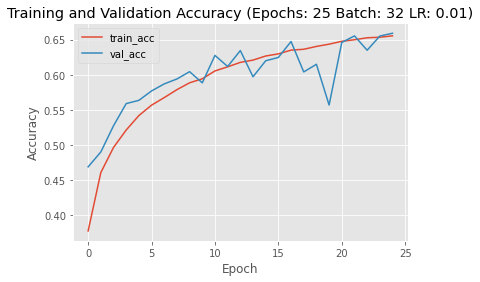

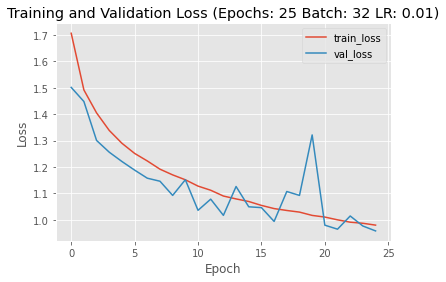

In [0]:
lenet5_dropout_25_5_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),
                          padding='same', activation='relu'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.25),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1),
                          activation='relu', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # Dropout
   tf.keras.layers.Dropout(0.25),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   # Dropout
   tf.keras.layers.Dropout(0.5),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_dropout_25_5_model,
               epochs=25,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.7 El mejor modelo LeNet para Cifar10

Después de las experimentaciones pasadas, podemos hacer algunos ajustes para producir un modelo que posea un mejor nivel de accuracy y una mínima varianza.

Con este modelo se alcanza:

* Training accuracy: 76.10%
* Validation accuracy: 73%
* Test accuracy: 73%
* Tiempo: 136.14s

Que demuestra un buen nivel de generalización, bajo overfit y accuracy aceptable tanto en el dataset de validación como en un dataset que el modelo nunca ha visto antes, el de test.

Para alcanzar estos resultados se hicieron las siguientes adecuaciones:

1. Se usó un Dropout de 0.25 en las capas ocultas y de 0.5 para la capa de salida, conforme a lo observado en anteriores puntos.
2. No se usa Batch Normalization. Derivado de las observaciones en puntos anteriores en las que BN no mejora de manera significativa el performance e introduce fluctuaciones o ruido al proceso de generalización.
3. Se usa MaxPooling
4. Se usa ReLU como función de activación en todas las capas.
5. De acuerdo a literatura, se aumentan los filtros en la capa de entrada a 32 y 64 para la primera y segunda convolución respectivamente.
6. Se reduce las capas densas de 2 a 1 con 1024 neuronas.
7. Se aplica _early stopping_ y se reduce el número de epochs a 15 para evitar overfitting.

Con esto se logra un mejor accuracy y un entrenamiento en menos tiempo.

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6839 - accuracy: 0.3833 - val_loss: 1.3924 - val_accuracy: 0.5044
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3188 - accuracy: 0.5258 - val_loss: 1.1712 - val_accuracy: 0.5834
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1716 - accuracy: 0.5814 - val_loss: 1.0427 - val_accuracy: 0.6298
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0779 - accuracy: 0.6161 - val_loss: 0.9979 - val_accuracy: 0.6463
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0144 - accuracy: 0.6434 - val_loss: 0.9837 - val_accuracy: 0.6553
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9628 - accuracy: 0.6607 - val_loss: 0.9024 - val_accuracy: 0.6877
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9237 - accuracy: 0.6728 - val_loss: 0.8815 - val_accuracy:

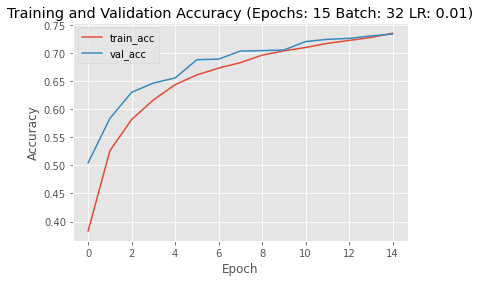

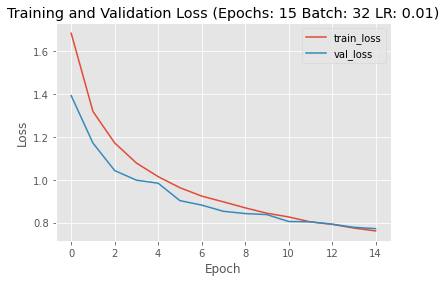

In [0]:
best_lenet5_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=32,
                          kernel_size=4,
                          strides=(1,1),
                          padding='same',
                          activation='relu'),

   #BN After C1 Activation
   #tf.keras.layers.BatchNormalization(axis=-1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

   # Dropout
   tf.keras.layers.Dropout(0.25),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=64,
                          kernel_size=4,
                          activation='relu',
                          padding='same'),

   #BN After C1 Activation
   #tf.keras.layers.BatchNormalization(axis=-1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

   # Dropout
   tf.keras.layers.Dropout(0.25),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   #tf.keras.layers.Dense(120, activation='relu'),

   #tf.keras.layers.BatchNormalization(axis=-1),

   #FC-6 - Fully connected layer:
   #tf.keras.layers.Dense(84, activation='relu'),

   tf.keras.layers.Dense(1024, activation='relu'),

   # Dropout
   tf.keras.layers.Dropout(0.5),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(best_lenet5_model,
               epochs=15,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

## 7. Arquitectura Visual Geometric Group (VGG) **TBD**

El siguiente ejercicio utilizará la misma base de datos anterior, CIFAR-10, pero tomando como base una de las arquitecturas propuestas por el grupo Visual Geometric Group de la Universidad de Oxford, liderados por Andrew Zisserman y Andrea Vedaldi: https://www.robots.ox.ac.uk/~vgg/.

En la Tabla 1 de la página 3 se muestran las arquitecturas propuestas por los autores en el artículo de 2015 y donde la entrada era para imágenes de tamaño 224x224x3:

https://www.robots.ox.ac.uk/~vgg/publications/2015/Simonyan15/simonyan15.pdf

En nuestro caso, como las imágenes de CIFAR-10 son más pequeñas, 32x32, debemos adaptar de alguna manera la arquitectura VGG, no solamente en el tamaño de las imágenes de entrada, sino en la cantidad de capas MaxPooling que podrías ser aplicadas y la cantidad de filtros en cada capa convolucional. Para ello considera los siguientes ajustes, toma como referencia la columna B de la Tabla 1, página 3, del artículo de Simoyan & Zisserman:

* Las imágenes de entrada serán de tamaño, 32x32x3, ya que son las imágenes de
color de CIFAR-10.
* Aplicaremos solamente los primeros dos bloques de las capas ocultas. ¿Porqué no tendría sentido aplicar aquí los otros tres bloques que se indican en la Tabla del artículo?
* Como nuestras imágenes son más pequeñas, usaremos la mitad de los filtros en cada uno de los dos bloques de las capas ocultas, es decir, en este caso 32 y 64.
* En las capas de salida, como los autores la definieron para un conjunto de 1000 clases y nosotros tenemos solamente 100, entonces deberás ajustar dichas capas de salida al 10%. Ajustando los valores a potencias de 2, quedarían dos capas de FC-512, una FC-10. Pero nuevamente, como nosotros tenemos menos pixeles qué procesar, con una sola capa podría ser suficiente.

* Lee la sección 2.1, página 2, del artículo de Simoyan & Zisserman para los
parámetros stride, funciones de activación y Padding de cada etapa.
* Utiliza Batch-Normalization y Dropout donde lo consideres adecuado.
* Utiliza Gradiente Descendente por mini-bloques como método de optimización y
con los parámetros que consideres adecuados. Igualmente determina los mejores
valores para Epochs y batch-size.
* Es decir, finalmente debes implementar una CNN con la siguiente arquitectura.

|Variante arquitectura VGG|Input ( 32 x 32 RGB image )|
|-------------------------|:------:|
|Capas ocultas - Bloque 1 |conv3-32|
|                         |conv3-32|
|                         |maxpool |
|Capas ocultas - Bloque 2 |conv3-64|
|                         |conv3-64|
|                         |maxpool |
|Capas Densas (Fully-Connected) de salida|FC-512|
|                         |FC-10   |
|                         |Soft-max|

* Incluye el reporte de las métricas precisión, recall, f1-score; las gráficas de los errores y desempeño del mejor modelo.
* En particular, muestra la matriz de confusión y algunas de las imágenes de las
clases en las que mayormente se equivocó el modelo.
* Una vez obtenido el mejor modelo, repítelo 10 veces y reporta el valor promedio de las métricas precisión, recall y f1-score.
* Reporta tus conclusiones finales de esta arquitectura y en comparación con los
resultados obtenidos con LeNet-5.

---

### Conclusiones

¿Porqué no tendría sentido aplicar aquí los otros tres bloques que se indican en la Tabla del artículo? Porque las imágenes son tan pequeñas que se corre el riesgo que durante estos 3 bloques se pierda información que contamine el resto del modelo. El VGG indicado en el paper fue hecho para imágenes 7 veces más grandes, de 224 pixeles, no de 32 px como las de CIFAR10.

VGG tiene un mejor rendimiento, tanto al entrenar como en el tiempo en converger a un óptimo resultado de 80% después de 10 epochs.

De igual manera, se aprecia que el accuracy es mejor en VGG que en LeNet5, esto se puede explicar por el hecho de que hay más capas y más kernels en VGG por lo que está mejor preparada para imágenes más grandes y que sean a color.

---

### Mejor modelo
Con los siguientes parámetros en la arquitectura:

* Todas las funciones de activación con ReLU
* MaxPooling
* Batch: 32
* Epoch: 20
* Batch Normalization: Después de las funciones de activación en las capas ocultas
* Dropout 0.25 en las capas oculta y 0.5 en capas de salida

Se aprecian lo siguientes resultados:

* Training Accuracy: 83.15%
* Val Accuracy: 80%
* Test Accuracy: 78%
* Training Time: 180.82s

Se tiene una varianza mínima y el modelo está generalizando relativamente bien.

---

### Métricas promedio después de 10 corridas

Al correr 10 veces el modelo encontrado anteriormente se tiene en promedio las siguientes métricas:

* Validación
 * Precisión: 0.80
 0.80 0.80 0.80 0.80 0.80 0.80 0.80 0.81 0.80 0.79
 * Recall: 0.80
 0.80 0.81 0.80 0.80 0.80 0.80 0.80 0.81 0.80 0.79
 * f1-score: 0.80
 0.80 0.80 0.80 0.80 0.80 0.80 0.80 0.80 0.80 0.79

* Testing:
 * Precisión: 0.79
 0.80 0.79 0.78 0.79 0.79 0.77 0.80 0.80 0.78 0.79
 * Recall: 0.79
 0.80 0.79 0.78 0.79 0.80 0.77 0.80 0.80 0.78 0.79
 * f1-score: 0.79
 0.80 0.79 0.78 0.79 0.79 0.77 0.80 0.79 0.78 0.79



### 7.1 VGG Model TBD

Epoch 1/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7270 - accuracy: 0.3958 - val_loss: 1.5767 - val_accuracy: 0.4613
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2132 - accuracy: 0.5676 - val_loss: 1.0171 - val_accuracy: 0.6401
Epoch 3/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0021 - accuracy: 0.6439 - val_loss: 0.8273 - val_accuracy: 0.7103
Epoch 4/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8873 - accuracy: 0.6866 - val_loss: 0.7749 - val_accuracy: 0.7300
Epoch 5/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8058 - accuracy: 0.7156 - val_loss: 0.7431 - val_accuracy: 0.7444
Epoch 6/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7512 - accuracy: 0.7356 - val_loss: 0.6894 - val_accuracy: 0.7606
Epoch 7/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7041 - accuracy: 0.7512 - val_loss: 0.6714 - val_ac

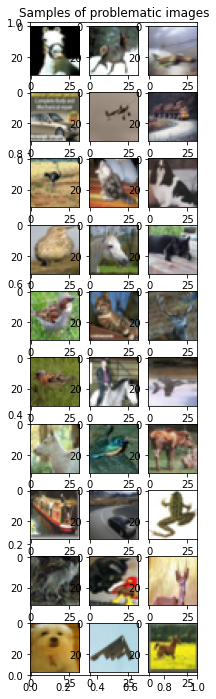

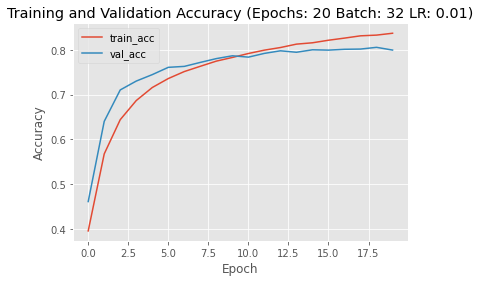

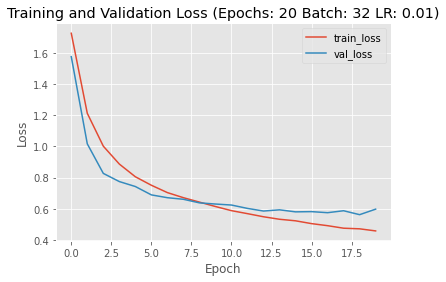

In [7]:
vgg_model = tf.keras.models.Sequential([
   
   # ------- C1 Block 1-------:
   tf.keras.layers.Conv2D(input_shape=(32,32,3),
                          filters=32,
                          kernel_size=3,
                          strides=(1,1),
                          padding='same',
                          activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   tf.keras.layers.Conv2D(filters=32,
                          kernel_size=3,
                          strides=(1,1),
                          padding='same',
                          activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),
  
   #Pooling layer for C1:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                strides=(2,2)),

   # Dropout
   tf.keras.layers.Dropout(0.25),
   
   # ------- C2 Block 2 -------:
   tf.keras.layers.Conv2D(filters=64,
                          kernel_size=3,
                          strides=(1,1),
                          padding='same',
                          activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),

   tf.keras.layers.Conv2D(filters=64,
                          kernel_size=3,
                          strides=(1,1),
                          padding='same',
                          activation='relu'),

   tf.keras.layers.BatchNormalization(axis=-1),
  
   #Pooling layer for C1:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                strides=(2,2)),

   # Dropout
   tf.keras.layers.Dropout(0.25),

   # ------- Dense layers -------:

   tf.keras.layers.Flatten(),

   tf.keras.layers.Dense(512,
                         activation='relu'),

   #tf.keras.layers.BatchNormalization(axis=-1),

   # Dropout
   tf.keras.layers.Dropout(0.5),

   #Output   
   tf.keras.layers.Dense(10,
                         activation=tf.nn.softmax)
   ])

evaluate_model(vgg_model,
               epochs=20,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True,
               should_print_test_error_samples=True)

### 7.2 10 Corridas de VGG

Para el siguiente experimento se harán 10 corridas de 20 epochs cada uno para calcular el promedio de las métricas, para ello se separará en bloques de 3 para poder hacer checkpoints y no sobrepasar los recursos disponibles.

In [0]:
def get_new_vgg_model() -> tf.keras.models.Sequential:

    return tf.keras.models.Sequential([
    
        # ------- C1 Block 1-------:
        tf.keras.layers.Conv2D(input_shape=(32,32,3),
                                filters=32,
                                kernel_size=3,
                                strides=(1,1),
                                padding='same',
                                activation='relu'),

        tf.keras.layers.BatchNormalization(axis=-1),

        tf.keras.layers.Conv2D(filters=32,
                                kernel_size=3,
                                strides=(1,1),
                                padding='same',
                                activation='relu'),

        tf.keras.layers.BatchNormalization(axis=-1),
        
        #Pooling layer for C1:
        tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                        strides=(2,2)),

        # Dropout
        tf.keras.layers.Dropout(0.25),
        
        # ------- C2 Block 2 -------:
        tf.keras.layers.Conv2D(filters=64,
                                kernel_size=3,
                                strides=(1,1),
                                padding='same',
                                activation='relu'),

        tf.keras.layers.BatchNormalization(axis=-1),

        tf.keras.layers.Conv2D(filters=64,
                                kernel_size=3,
                                strides=(1,1),
                                padding='same',
                                activation='relu'),

        tf.keras.layers.BatchNormalization(axis=-1),
        
        #Pooling layer for C1:
        tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                        strides=(2,2)),

        # Dropout
        tf.keras.layers.Dropout(0.25),

        # ------- Dense layers -------:

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512,
                                activation='relu'),

        #tf.keras.layers.BatchNormalization(axis=-1),

        # Dropout
        tf.keras.layers.Dropout(0.5),

        #Output   
        tf.keras.layers.Dense(10,
                                activation=tf.nn.softmax)
    ])

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7062 - accuracy: 0.4018 - val_loss: 1.2210 - val_accuracy: 0.5580
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2163 - accuracy: 0.5668 - val_loss: 0.9706 - val_accuracy: 0.6599
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0126 - accuracy: 0.6442 - val_loss: 0.9012 - val_accuracy: 0.6844
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9021 - accuracy: 0.6823 - val_loss: 0.7840 - val_accuracy: 0.7258
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8193 - accuracy: 0.7128 - val_loss: 0.7249 - val_accuracy: 0.7429
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7619 - accuracy: 0.7328 - val_loss: 0.7642 - val_accuracy: 0.7358
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7212 - accuracy: 0.7463 - val_loss: 0.6807 - val_accuracy:

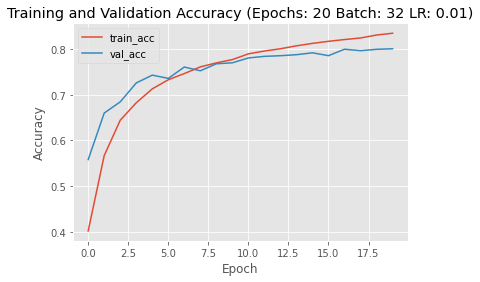

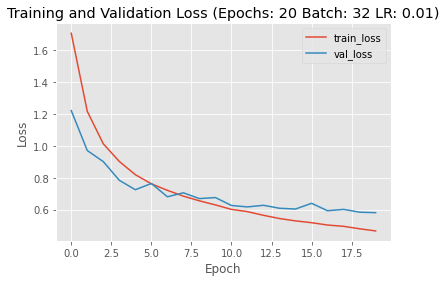

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6825 - accuracy: 0.4121 - val_loss: 1.2085 - val_accuracy: 0.5587
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1927 - accuracy: 0.5748 - val_loss: 0.9999 - val_accuracy: 0.6429
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0041 - accuracy: 0.6448 - val_loss: 0.8621 - val_accuracy: 0.6988
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8993 - accuracy: 0.6812 - val_loss: 0.7958 - val_accuracy: 0.7206
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8208 - accuracy: 0.7103 - val_loss: 0.7516 - val_accuracy: 0.7340
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7717 - accuracy: 0.7286 - val_loss: 0.7273 - val_accuracy: 0.7450
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7287 - accuracy: 0.7426 - val_loss: 0.7048 - val_accuracy:

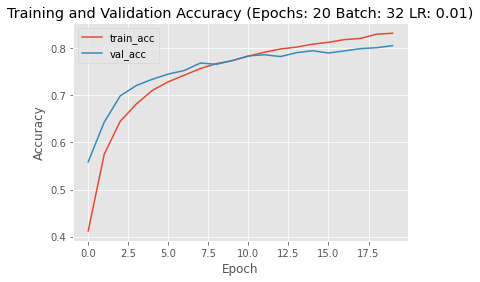

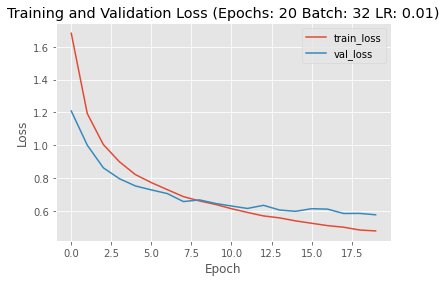

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7061 - accuracy: 0.4006 - val_loss: 1.2155 - val_accuracy: 0.5671
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2208 - accuracy: 0.5646 - val_loss: 1.0872 - val_accuracy: 0.6158
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0175 - accuracy: 0.6432 - val_loss: 0.8549 - val_accuracy: 0.6940
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9037 - accuracy: 0.6802 - val_loss: 0.7933 - val_accuracy: 0.7204
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8263 - accuracy: 0.7097 - val_loss: 0.7647 - val_accuracy: 0.7280
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7731 - accuracy: 0.7283 - val_loss: 0.7067 - val_accuracy: 0.7513
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7235 - accuracy: 0.7464 - val_loss: 0.6977 - val_accuracy:

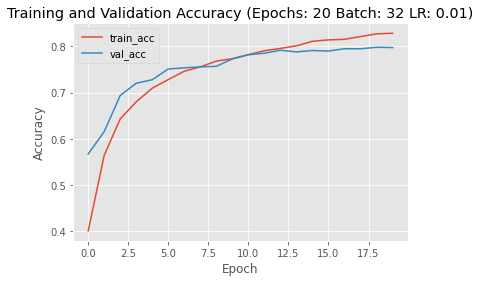

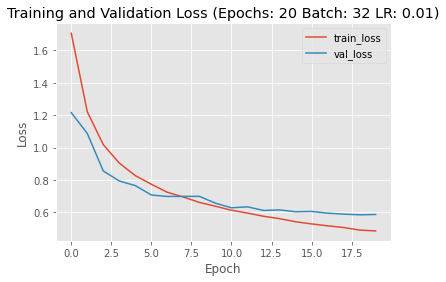

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6660 - accuracy: 0.4150 - val_loss: 1.3151 - val_accuracy: 0.5297
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1782 - accuracy: 0.5799 - val_loss: 0.9943 - val_accuracy: 0.6482
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9901 - accuracy: 0.6503 - val_loss: 0.8391 - val_accuracy: 0.7089
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8743 - accuracy: 0.6917 - val_loss: 0.7703 - val_accuracy: 0.7355
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7943 - accuracy: 0.7217 - val_loss: 0.7487 - val_accuracy: 0.7436
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7441 - accuracy: 0.7383 - val_loss: 0.7025 - val_accuracy: 0.7552
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6998 - accuracy: 0.7559 - val_loss: 0.6897 - val_accuracy:

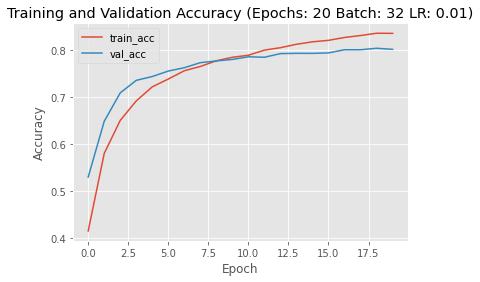

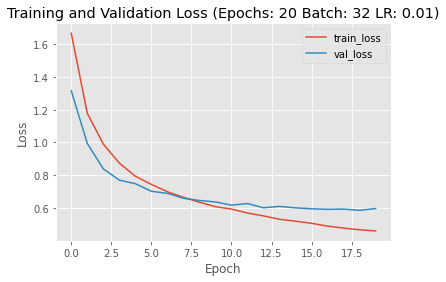

In [0]:
for i in range(4):
    evaluate_model(get_new_vgg_model(),
               epochs=20,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7089 - accuracy: 0.3966 - val_loss: 1.2623 - val_accuracy: 0.5396
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2150 - accuracy: 0.5665 - val_loss: 0.9900 - val_accuracy: 0.6529
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0103 - accuracy: 0.6419 - val_loss: 0.8890 - val_accuracy: 0.6852
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8997 - accuracy: 0.6830 - val_loss: 0.8105 - val_accuracy: 0.7168
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8245 - accuracy: 0.7102 - val_loss: 0.7387 - val_accuracy: 0.7405
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7703 - accuracy: 0.7300 - val_loss: 0.7655 - val_accuracy: 0.7333
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7218 - accuracy: 0.7468 - val_loss: 0.6700 - val_accuracy:

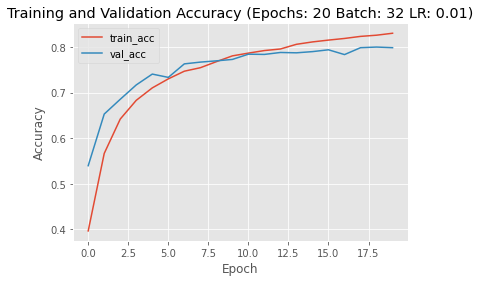

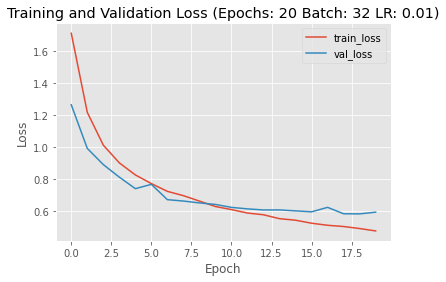

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7252 - accuracy: 0.3991 - val_loss: 1.4294 - val_accuracy: 0.4919
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2429 - accuracy: 0.5586 - val_loss: 1.0679 - val_accuracy: 0.6154
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0527 - accuracy: 0.6273 - val_loss: 0.8779 - val_accuracy: 0.6888
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9489 - accuracy: 0.6664 - val_loss: 0.8424 - val_accuracy: 0.7051
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8671 - accuracy: 0.6952 - val_loss: 0.7756 - val_accuracy: 0.7286
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8090 - accuracy: 0.7169 - val_loss: 0.7499 - val_accuracy: 0.7375
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7707 - accuracy: 0.7289 - val_loss: 0.7154 - val_accuracy:

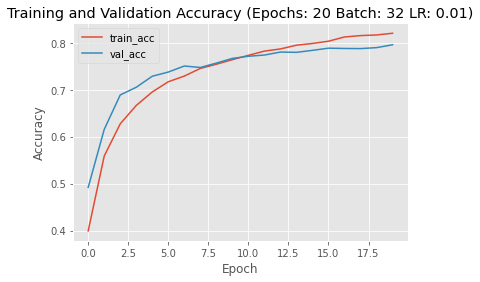

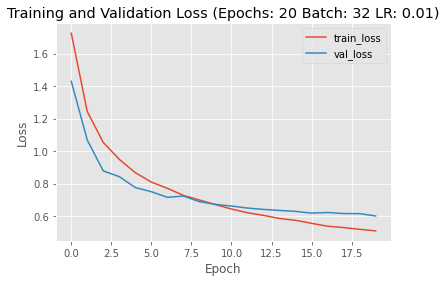

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7000 - accuracy: 0.4035 - val_loss: 1.1856 - val_accuracy: 0.5788
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1999 - accuracy: 0.5743 - val_loss: 1.0995 - val_accuracy: 0.6087
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0012 - accuracy: 0.6471 - val_loss: 0.8710 - val_accuracy: 0.6920
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8908 - accuracy: 0.6864 - val_loss: 0.7541 - val_accuracy: 0.7427
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8129 - accuracy: 0.7151 - val_loss: 0.7247 - val_accuracy: 0.7504
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7642 - accuracy: 0.7325 - val_loss: 0.7172 - val_accuracy: 0.7538
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7263 - accuracy: 0.7452 - val_loss: 0.6905 - val_accuracy:

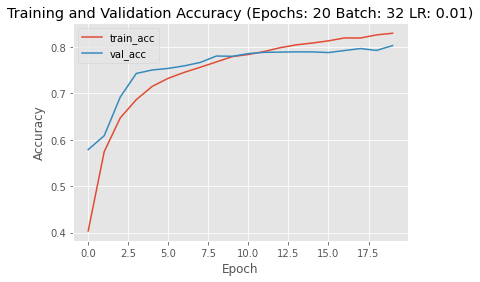

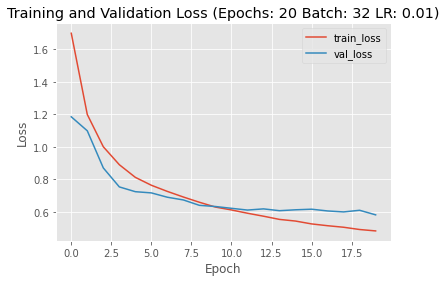

In [0]:
for i in range(3):
    evaluate_model(get_new_vgg_model(),
               epochs=20,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6753 - accuracy: 0.4136 - val_loss: 1.1938 - val_accuracy: 0.5776
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1776 - accuracy: 0.5834 - val_loss: 0.9474 - val_accuracy: 0.6689
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9977 - accuracy: 0.6477 - val_loss: 0.8979 - val_accuracy: 0.6871
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8921 - accuracy: 0.6862 - val_loss: 0.8272 - val_accuracy: 0.7094
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8207 - accuracy: 0.7102 - val_loss: 0.7617 - val_accuracy: 0.7346
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7601 - accuracy: 0.7342 - val_loss: 0.7162 - val_accuracy: 0.7542
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7187 - accuracy: 0.7479 - val_loss: 0.6799 - val_accuracy:

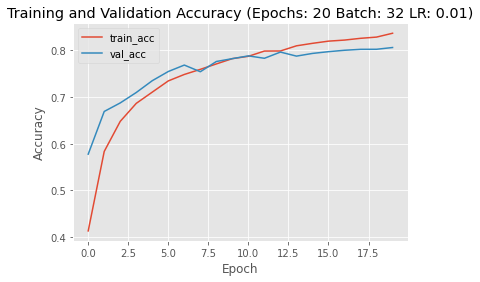

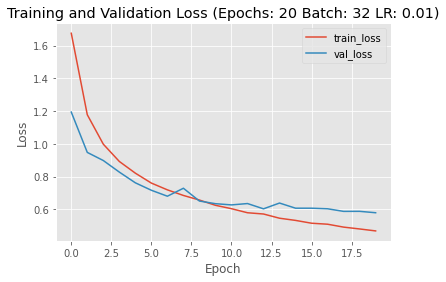

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7198 - accuracy: 0.3973 - val_loss: 1.3173 - val_accuracy: 0.5225
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2335 - accuracy: 0.5576 - val_loss: 1.0412 - val_accuracy: 0.6340
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0511 - accuracy: 0.6288 - val_loss: 0.9321 - val_accuracy: 0.6739
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9388 - accuracy: 0.6686 - val_loss: 0.8644 - val_accuracy: 0.6977
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8654 - accuracy: 0.6949 - val_loss: 0.8118 - val_accuracy: 0.7228
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8071 - accuracy: 0.7148 - val_loss: 0.7845 - val_accuracy: 0.7237
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7642 - accuracy: 0.7303 - val_loss: 0.7169 - val_accuracy:

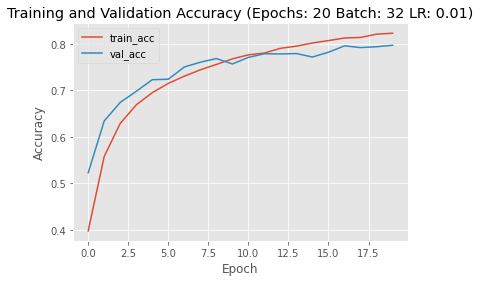

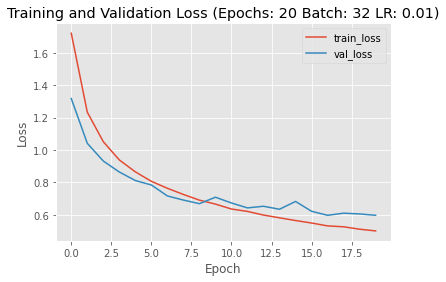

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6784 - accuracy: 0.4116 - val_loss: 1.2260 - val_accuracy: 0.5584
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1988 - accuracy: 0.5753 - val_loss: 0.9597 - val_accuracy: 0.6610
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0178 - accuracy: 0.6432 - val_loss: 0.8910 - val_accuracy: 0.6870
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9150 - accuracy: 0.6785 - val_loss: 0.7951 - val_accuracy: 0.7212
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8435 - accuracy: 0.7032 - val_loss: 0.7753 - val_accuracy: 0.7319
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7850 - accuracy: 0.7242 - val_loss: 0.7258 - val_accuracy: 0.7476
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7410 - accuracy: 0.7407 - val_loss: 0.7051 - val_accuracy:

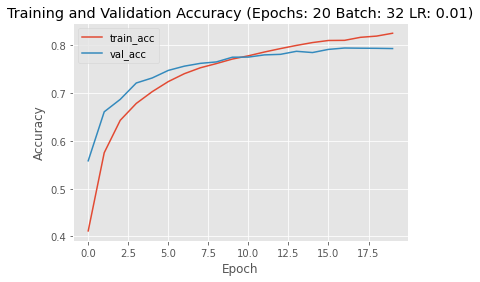

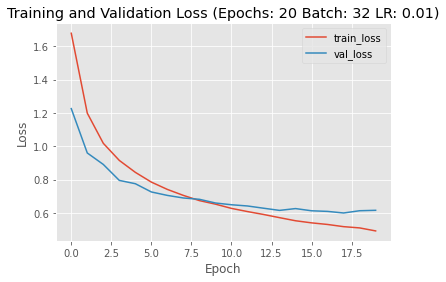

In [0]:
for i in range(3):
    evaluate_model(get_new_vgg_model(),
               epochs=20,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               validation_tuple=(x_val, y_one_hot_val),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)